In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df=pd.read_excel("Manufacturing_Line_Productivity.xlsx")
df


,Date,Product,Batch,Operator,Start Time,End Time
0,2024-08-29,OR-600,422111,Mac,11:50:00,14:05:00
1,2024-08-29,LE-600,422112,Mac,14:05:00,15:45:00
2,2024-08-29,LE-600,422113,Mac,15:45:00,17:35:00
3,2024-08-29,LE-600,422114,Mac,17:35:00,19:15:00
4,2024-08-29,LE-600,422115,Charlie,19:15:00,20:39:00
5,2024-08-29,LE-600,422116,Charlie,20:39:00,21:39:00
6,2024-08-29,LE-600,422117,Charlie,21:39:00,22:54:00
7,2024-08-30,CO-600,422118,Dee,04:05:00,06:05:00
8,2024-08-30,CO-600,422119,Dee,06:05:00,07:30:00
9,2024-08-30,CO-600,422120,Dee,07:30:00,09:22:00


In [98]:
xls = pd.ExcelFile('Manufacturing_Line_Productivity.xlsx') 
print(xls.sheet_names)

Line_productivity = pd.read_excel(xls, sheet_name="Line productivity")
Products = pd.read_excel(xls, sheet_name="Products")
Downtime_factors = pd.read_excel(xls, sheet_name="Downtime factors")
Line_downtime= pd.read_excel(xls, sheet_name="Line downtime")


print(Line_productivity.head(),"\n\n")
print(Products.head(),"\n\n")
print(Downtime_factors.head(),"\n\n")
print(Line_downtime.head(),"\n\n")

print(Line_productivity.info(),"\n\n")
print(Products.info(),"\n\n")
print(Downtime_factors.info(),"\n\n")
print(Line_downtime.info(),"\n\n")




['Line productivity', 'Sheet1', 'Products', 'Downtime factors', 'Line downtime']
        Date Product   Batch Operator Start Time  End Time
0 2024-08-29  OR-600  422111      Mac   11:50:00  14:05:00
1 2024-08-29  LE-600  422112      Mac   14:05:00  15:45:00
2 2024-08-29  LE-600  422113      Mac   15:45:00  17:35:00
3 2024-08-29  LE-600  422114      Mac   17:35:00  19:15:00
4 2024-08-29  LE-600  422115  Charlie   19:15:00  20:39:00 


  Product      Flavor    Size  Min batch time
0  OR-600      Orange  600 ml              60
1  LE-600  Lemon lime  600 ml              60
2  CO-600        Cola  600 ml              60
3  DC-600   Diet Cola  600 ml              60
4  RB-600  Root Berry  600 ml              60 


   Factor         Description Operator Error
0       1      Emergency stop             No
1       2        Batch change            Yes
2       3      Labeling error             No
3       4  Inventory shortage             No
4       5       Product spill            Yes 


    Batch 

KeyError: 0

In [99]:
Line_downtime = Line_downtime.melt(
    id_vars=["Batch"],
    var_name="Factor",
    value_name="Downtime"    
)

Line_downtime.dropna(inplace=True)
Line_downtime


,Batch,Factor,Downtime
38,422111,2,60.0
39,422112,2,20.0
40,422113,2,50.0
44,422117,2,10.0
57,422130,2,20.0
...,...,...,...
432,422125,12,10.0
436,422129,12,15.0
442,422135,12,15.0
448,422141,12,7.0


In [100]:


df = pd.DataFrame({
    'Start Time': ['01:05:00', '02:15:00'],
    'End Time': ['02:05:00', '03:25:00']
})

df['Start Time'] = pd.to_datetime('1900-01-01 ' + df['Start Time'])
df['End Time'] = pd.to_datetime('1900-01-01 ' + df['End Time'])

df['Duration'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 60  
print(df)

import datetime

df['Start Time'] = pd.to_datetime(df['Start Time'].apply(lambda x: f'2025-01-01 {x}' if isinstance(x, datetime.time) else x))

df['Time of Day'] = df['Start Time'].dt.hour.apply(lambda x: 'Morning' if x < 12 else 'Evening')
df
import datetime

df['Start Time'] = pd.to_datetime(df['Start Time'].apply(lambda x: f'2025-01-01 {x}' if isinstance(x, datetime.time) else x))

df['Time of Day'] = df['Start Time'].dt.hour.apply(lambda x: 'Morning' if x < 12 else 'Evening')
df


           Start Time            End Time  Duration
0 1900-01-01 01:05:00 1900-01-01 02:05:00      60.0
1 1900-01-01 02:15:00 1900-01-01 03:25:00      70.0


,Start Time,End Time,Duration,Time of Day
0,1900-01-01 01:05:00,1900-01-01 02:05:00,60.0,Morning
1,1900-01-01 02:15:00,1900-01-01 03:25:00,70.0,Morning


In [101]:
df3=Line_downtime.merge(Downtime_factors,how='left' , on='Factor')
df3

,Batch,Factor,Downtime,Description,Operator Error
0,422111,2,60.0,Batch change,Yes
1,422112,2,20.0,Batch change,Yes
2,422113,2,50.0,Batch change,Yes
3,422117,2,10.0,Batch change,Yes
4,422130,2,20.0,Batch change,Yes
...,...,...,...,...,...
56,422125,12,10.0,Other,No
57,422129,12,15.0,Other,No
58,422135,12,15.0,Other,No
59,422141,12,7.0,Other,No


In [102]:
#Total downtime for each batch

downtime_per_batch = Line_downtime.groupby('Batch')['Downtime'].sum().reset_index()
print(downtime_per_batch)

     Batch  Downtime
0   422111      75.0
1   422112      40.0
2   422113      50.0
3   422114      40.0
4   422115      24.0
5   422117      15.0
6   422118      60.0
7   422119      25.0
8   422120      52.0
9   422121      15.0
10  422122      25.0
11  422123      73.0
12  422124      40.0
13  422125      20.0
14  422126      44.0
15  422127      23.0
16  422128      52.0
17  422129      15.0
18  422130      20.0
19  422131      30.0
20  422133      20.0
21  422134      50.0
22  422135      45.0
23  422137      45.0
24  422138      20.0
25  422139      35.0
26  422140      63.0
27  422141       7.0
28  422142      30.0
29  422143      58.0
30  422144      54.0
31  422145      22.0
32  422146      62.0
33  422147     107.0
34  422148      32.0


In [104]:
#Total downtime aggregation for each downtime factor

top_downtime_factors = Line_downtime.groupby('Factor')['Downtime'].sum().reset_index()
print(top_downtime_factors)

    Factor  Downtime
0        2     160.0
1        3      42.0
2        4     225.0
3        5      57.0
4        6     332.0
5        7     254.0
6        8     145.0
7        9      17.0
8       10      49.0
9       11      33.0
10      12      74.0


In [105]:
#Ranking factors in descending order based on impact

top_downtime_factors = top_downtime_factors.sort_values(by='Downtime', ascending=False)

print(top_downtime_factors.head(10)) 

    Factor  Downtime
4        6     332.0
5        7     254.0
2        4     225.0
0        2     160.0
6        8     145.0
10      12      74.0
3        5      57.0
8       10      49.0
1        3      42.0
9       11      33.0


In [106]:
#Calculation of total downtime due to operator error

operator_error_downtime = df3[df3['Operator Error'] == 'Yes']['Downtime'].sum()

#Comparison of the impact of operator error with other factors

total_downtime = df3['Downtime'].sum()
operator_error_percentage = (operator_error_downtime / total_downtime) * 100

print(f'Total Downtime: {total_downtime:.2f} minutes')
print(f'Operator Error Contribution: {operator_error_downtime:.2f} minutes ({operator_error_percentage:.2f}%)')


Total Downtime: 1388.00 minutes
Operator Error Contribution: 776.00 minutes (55.91%)


In [107]:
downtime_with_product = Line_productivity.merge(downtime_per_batch, on='Batch')

# Calculation of average downtime per product

downtime_per_product = downtime_with_product.groupby('Product')['Downtime'].mean().reset_index()

# Ranking products from most affected to least affected

downtime_per_product = downtime_per_product.sort_values(by='Downtime', ascending=False)

print(downtime_per_product.head(10)) 


  Product   Downtime
4  OR-600  75.000000
0   CO-2L  55.400000
2  DC-600  38.333333
5  RB-600  36.857143
1  CO-600  35.285714
3  LE-600  33.800000


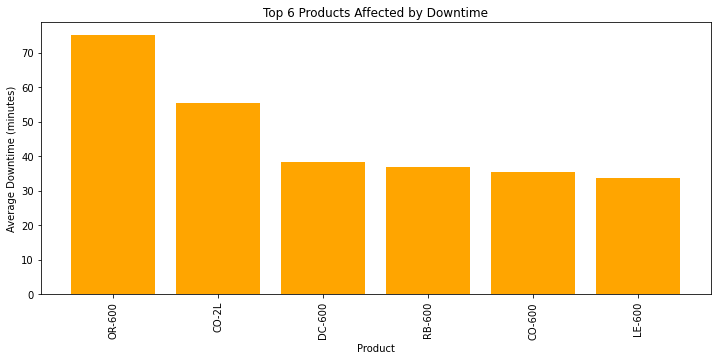

In [108]:
plt.figure(figsize=(12,5))
plt.bar(downtime_per_product['Product'][:10], downtime_per_product['Downtime'][:10], color='orange')
plt.xlabel('Product')
plt.ylabel('Average Downtime (minutes)')
plt.title('Top 6 Products Affected by Downtime')
plt.xticks(rotation=90)
plt.show()

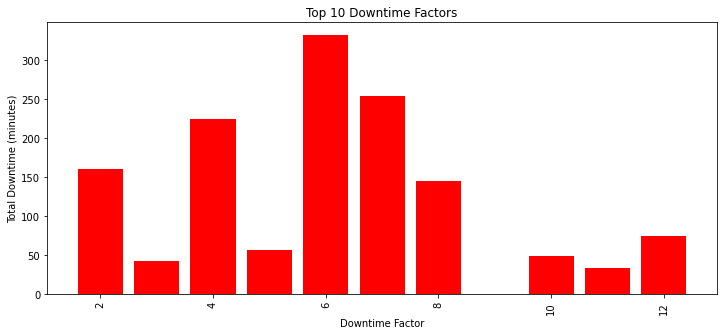

In [79]:
plt.figure(figsize=(12,5))
plt.bar(top_downtime_factors['Factor'][:10], top_downtime_factors['Downtime'][:10], color='r')
plt.xlabel('Downtime Factor')
plt.ylabel('Total Downtime (minutes)')
plt.title('Top 10 Downtime Factors')
plt.xticks(rotation=90)
plt.show()

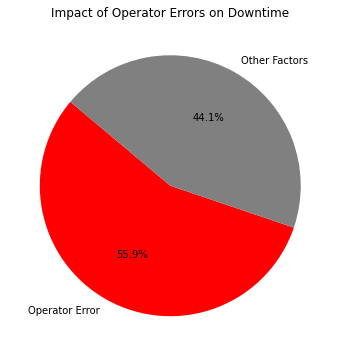

In [109]:
labels = ['Operator Error', 'Other Factors']
sizes = [operator_error_downtime, total_downtime - operator_error_downtime]
colors = ['red', 'gray']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Impact of Operator Errors on Downtime')
plt.show()

In [110]:
Line_productivity.merge(df3, how='left',on='Batch')

,Date,Product,Batch,Operator,Start Time,End Time,Factor,Downtime,Description,Operator Error
0,2024-08-29,OR-600,422111,Mac,11:50:00,14:05:00,2,60.0,Batch change,Yes
1,2024-08-29,OR-600,422111,Mac,11:50:00,14:05:00,7,15.0,Machine failure,No
2,2024-08-29,LE-600,422112,Mac,14:05:00,15:45:00,2,20.0,Batch change,Yes
3,2024-08-29,LE-600,422112,Mac,14:05:00,15:45:00,8,20.0,Batch coding error,Yes
4,2024-08-29,LE-600,422113,Mac,15:45:00,17:35:00,2,50.0,Batch change,Yes
...,...,...,...,...,...,...,...,...,...,...
59,2024-09-02,CO-2L,422147,Charlie,19:30:00,22:55:00,4,17.0,Inventory shortage,No
60,2024-09-02,CO-2L,422147,Charlie,19:30:00,22:55:00,6,60.0,Machine adjustment,Yes
61,2024-09-02,CO-2L,422147,Charlie,19:30:00,22:55:00,7,30.0,Machine failure,No
62,2024-09-03,CO-2L,422148,Mac,22:55:00,1900-01-01 01:05:00,4,25.0,Inventory shortage,No


In [111]:
#Most Frequent Downtime Cause
most_frequent_downtime_factor = Line_downtime['Factor'].value_counts().idxmax()
most_frequent_downtime_count = Line_downtime['Factor'].value_counts().max()

print(f"Most Frequent Downtime Factor: {most_frequent_downtime_factor} ({most_frequent_downtime_count} occurrences)")


Most Frequent Downtime Factor: 6 (12 occurrences)


In [126]:
most_problematic_product = downtime_per_product.iloc[0]
print(f"Product with Most Downtime: {most_problematic_product['Product']} ({most_problematic_product['Downtime']:.2f} minutes)")


Product with Most Downtime: OR-600 (75.00 minutes)


In [128]:
most_downtime_day = Line_productivity['Date'].value_counts().idxmax()
most_downtime_count = Line_productivity['Date'].value_counts().max()

print(f"The day with the highest downtime occurrence: {most_downtime_day}")
print(f"The number of downtimes on this day: {most_downtime_count}")


The day with the highest downtime occurrence: 2025-02-22
The number of downtimes on this day: 38
